<a href="https://colab.research.google.com/github/PolianaQueiroz/Master-Research-Lab/blob/main/Pratica_Modelos_N%C3%A3o_Lineares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

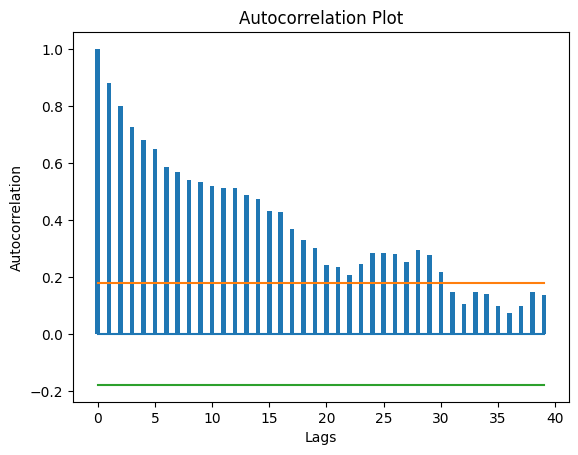

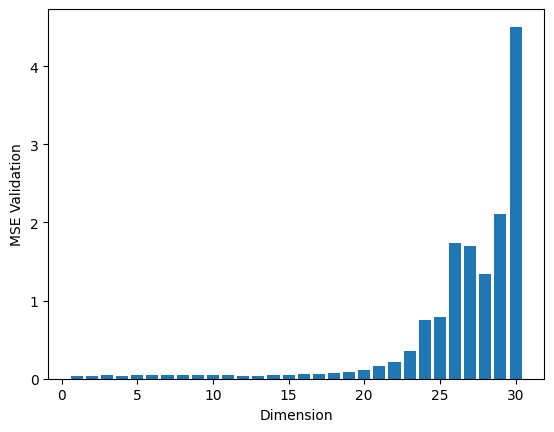

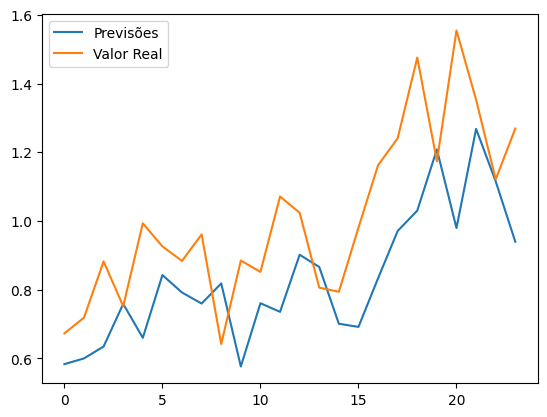

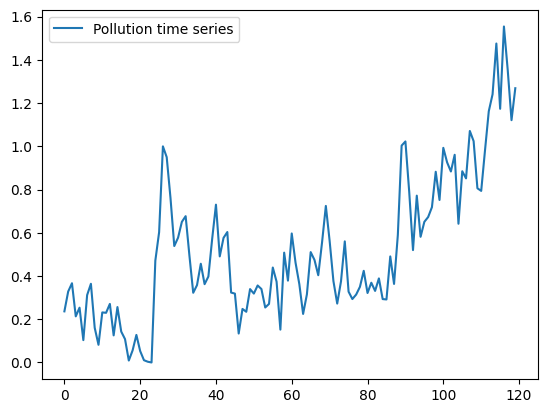

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt


def acf_plot(data,lags):
    values=[]
    for i in range((lags)):
        values.append(data.autocorr(i))

    plt.plot(np.zeros_like(values))
    plt.plot(np.ones_like(values)*1.96*(1/np.sqrt(len(data))))
    plt.plot(np.ones_like(values)*(-1.96)*(1/np.sqrt(len(data))))
    plt.bar(range(lags),values,width=0.4)
    plt.title('Autocorrelation Plot')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

trainSplit = 0.6 # Usado para treinar o modelo
validSplit= 0.2  #Verificar se o modelo é adequado



dataset = np.loadtxt('pollutn.txt')



trainSize = int(np.floor(trainSplit*len(dataset)))
validSize = int(np.floor(validSplit*len(dataset)))

maxData = np.max(dataset[0:trainSize])
minData = np.min(dataset[0:trainSize])

ndataset  = (dataset  - minData)/(maxData-minData)


datasetSeries = pd.Series(ndataset)
acf_plot(datasetSeries,40)
dimension = 30
stepahead = 1





bestValue = 10**10
model=0
erroBar = []

for dim in range(1,dimension+1,1):

    datasetShifted = pd.concat([datasetSeries.shift(i) for i in range(dim+stepahead) ],axis=1)
    train = (datasetShifted.iloc[dim:trainSize,1:])
    train = np.hstack((train,np.ones_like(train.iloc[:,0].values.reshape(len(train),1))))
    trainTarget = (datasetShifted.iloc[dim:trainSize,0])

    valid = datasetShifted.iloc[trainSize:(validSize+trainSize),1:]
    valid=np.hstack((valid,np.zeros_like(valid.iloc[:,0].values.reshape(len(valid),1))))
    validTarget = datasetShifted.iloc[trainSize:(validSize+trainSize),0]

    test = datasetShifted.iloc[(validSize+trainSize):,1:]
    test= np.hstack((test,np.ones_like(test.iloc[:,0].values.reshape(len(test),1))))
    testTarget = datasetShifted.iloc[(validSize+trainSize):,0]


    X_inv = np.linalg.pinv(train)
    coefs = X_inv.dot(trainTarget)

    predVal = coefs.dot(valid.T)
    erro = mse(predVal,validTarget)

    erroBar.append(erro)
    if(erro<bestValue):
        bestValue=erro
        model=coefs
        test_aux = test
        testTarget_aux = testTarget


plt.bar(range(1,dimension+1,1),erroBar)
plt.xlabel('Dimension')
plt.ylabel('MSE Validation')
plt.show()




predTest = model.dot(test_aux.T)

mse_test = mse(predTest,testTarget_aux)

plt.plot(predTest)
plt.plot(testTarget_aux.values)
plt.legend(['Previsões','Valor Real'])
plt.show()

plt.plot(datasetSeries)
plt.legend(['Pollution time series'])
plt.show()

In [ ]:
datasetShifted

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.236498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.328249,0.236498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.366612,0.328249,0.236498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.213306,0.366612,0.328249,0.236498,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.253616,0.213306,0.366612,0.328249,0.236498,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.173707,1.475704,1.240787,1.162388,0.980679,0.793874,0.805941,1.024014,1.071134,0.851755,...,0.581433,0.771861,0.519972,0.789821,1.022652,1.003424,0.590179,0.363392,0.490695,0.291583
116,1.554559,1.173707,1.475704,1.240787,1.162388,0.980679,0.793874,0.805941,1.024014,1.071134,...,0.650836,0.581433,0.771861,0.519972,0.789821,1.022652,1.003424,0.590179,0.363392,0.490695
117,1.353072,1.554559,1.173707,1.475704,1.240787,1.162388,0.980679,0.793874,0.805941,1.024014,...,0.672848,0.650836,0.581433,0.771861,0.519972,0.789821,1.022652,1.003424,0.590179,0.363392
118,1.121087,1.353072,1.554559,1.173707,1.475704,1.240787,1.162388,0.980679,0.793874,0.805941,...,0.718568,0.672848,0.650836,0.581433,0.771861,0.519972,0.789821,1.022652,1.003424,0.590179


In [ ]:
datasetShifted

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.021901,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.013141,0.021901,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.025405,0.013141,0.021901,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733,1.278143,1.434954,2.463863
126,1.024529,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733,1.278143,1.434954
127,0.707841,1.024529,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733,1.278143
128,1.667105,0.707841,1.024529,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733


In [ ]:
model

array([0.75775053, 0.09007063])

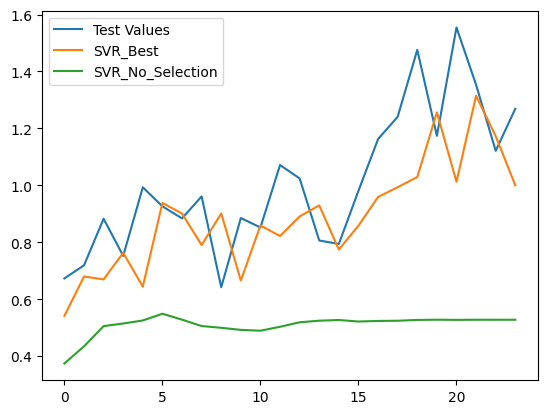

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR # support vector regression
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
trainSplit = 0.6
validSplit= 0.2


dataset = np.loadtxt('pollutn.txt')
trainSize = int(np.floor(trainSplit*len(dataset)))
validSize = int(np.floor(validSplit*len(dataset)))

maxData = np.max(dataset[0:trainSize])
minData = np.min(dataset[0:trainSize])

ndataset  = (dataset  - minData)/(maxData-minData)


datasetSeries = pd.Series(ndataset)
dimension = 12
stepahead = 1
datasetShifted = pd.concat([datasetSeries.shift(i) for i in range(dimension+stepahead) ],axis=1)

train = (datasetShifted.iloc[dimension:trainSize,1:])
trainTarget = (datasetShifted.iloc[dimension:trainSize,0])

valid = datasetShifted.iloc[trainSize:(validSize+trainSize),1:]
validTarget = datasetShifted.iloc[trainSize:(validSize+trainSize),0]

test = datasetShifted.iloc[(validSize+trainSize):,1:]
testTarget = datasetShifted.iloc[(validSize+trainSize):,0]



g=(10.0)**np.arange(-5,3,1) #10
e = (10.0)**np.arange(-4,-1,1) # 10
c=(10.0)**np.arange(-2,3,1)#10
bestValue = 10**100000
erroval = []
param=[]
bestSVR=0
for i in g:
    for j in e:
        for k in c:

            mySVR = SVR(C=k,gamma=i,epsilon=j)
            mySVR.fit(train,trainTarget)

            predVals = mySVR.predict(valid)
            erro = mse(predVals,validTarget)
            erroval.append(erro)
            param.append((i,j,k))
            if erro<bestValue:
                bestValue=erro
                bestSVR = mySVR


predTest = bestSVR.predict(test)
mseTest = mse(predTest,testTarget)

SVR_no_Selection = SVR()
SVR_no_Selection.fit(train,trainTarget)
predTestNoSelection = SVR_no_Selection.predict(test)

mseTest_noSelection = mse(predTestNoSelection,testTarget)







plt.plot(testTarget.values)
plt.plot(predTest)
plt.plot(predTestNoSelection)
#plt.plot(predSVRGridCV)
plt.legend(['Test Values','SVR_Best','SVR_No_Selection'])

In [ ]:
datasetShifted

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.021901,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.013141,0.021901,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.025405,0.013141,0.021901,0.000000,0.000876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733,1.278143,1.434954,2.463863
126,1.024529,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733,1.278143,1.434954
127,0.707841,1.024529,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733,1.278143
128,1.667105,0.707841,1.024529,1.710907,1.536137,1.548839,2.084537,1.595707,1.047306,1.714849,1.157249,1.770477,2.722733


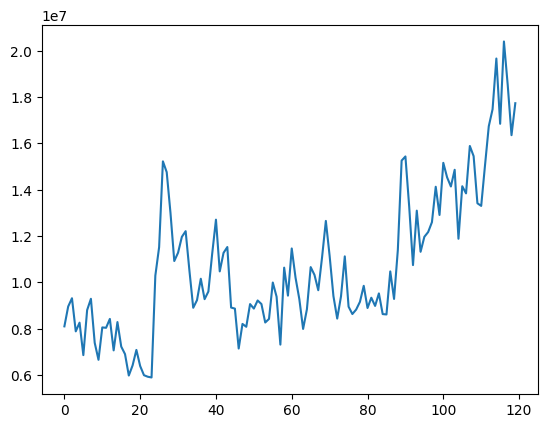

In [ ]:
plt.plot(dataset)